In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
invoices = pd.read_csv('fct_invoice.csv')
customers = pd.read_json('dim_customer.json')

print(invoices.head())
print(customers.head())


  invoice_no  customer_id  category  quantity    price payment_method  \
0    I138884          229  Clothing         5  1500.40    Credit Card   
1    I317333         3433     Shoes         3  1800.51     Debit Card   
2    I127801          644  Clothing         1   300.08           Cash   
3    I173702         4900     Shoes         5  3000.85    Credit Card   
4    I337046         1089     Books         4    60.60           Cash   

  invoice_date   shopping_mall  
0     5/8/2022          Kanyon  
1   12/12/2021  Forum Istanbul  
2    9/11/2021       Metrocity  
3   16/05/2021    Metropol AVM  
4   24/10/2021          Kanyon  
    age first_name gender  id last_name
0  48.0   Nicholas      M   0    Flores
1   NaN    Jeffery      M   1      Rowe
2  57.0     Alexis      F   2    Benton
3  73.0        Amy      F   3   Johnson
4  20.0      David      M   4     Moore


In [36]:
print(invoices.columns)
print(customers.columns)


Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')
Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')


In [26]:
### 🟩 EASY
# Q1 How many unique customers are in the dataset?
unique_customers = invoices['customer_id'].nunique()
print("Unique Customers:", unique_customers)


Unique Customers: 5191


In [27]:
# Q2 What are the different categories of products available? How many unique categories are there?
print("Unique Categories:", invoices['category'].unique())
print("Total Number of Categories:", invoices['category'].nunique())


Unique Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Total Number of Categories: 8


In [28]:
# Q3 Which payment method is the most popular? How many times was it used?
invoices['payment_method'].value_counts()

most_popular_method = invoices['payment_method'].value_counts().idxmax()
most_popular_count = invoices['payment_method'].value_counts().max()

most_popular_method, most_popular_count


('Cash', 44447)

In [29]:
### 🟧 Medium
# Q1 What are the three most popular categories, by total sales?
category_sales = invoices.groupby('category')['price'].sum().sort_values(ascending=False)

category_sales.head(3)


category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64

In [39]:
# Q2 What are the total sales attributed to customers over the age of 45?
customers.rename(columns={'id': 'customer_id'}, inplace=True)
merged_df = invoices.merge(customers, on='customer_id')

over45 = merged_df[merged_df['age'] > 45]
total_sales_over45 = over45['price'].sum()

print("Total sales attributed to customers over the age of 45:", total_sales_over45)

Total sales attributed to customers over the age of 45: 22370553.269999996


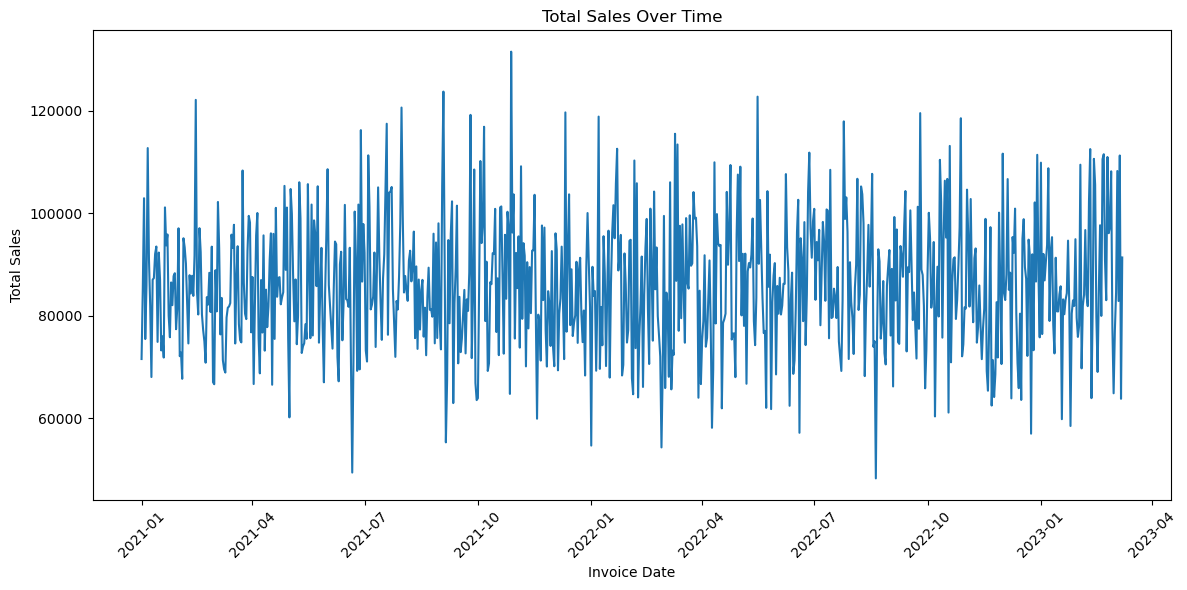

In [50]:
# Q3 How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? 
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True)

sales_by_date = invoices.groupby(invoices['invoice_date'].dt.date)['price'].sum()

plt.figure(figsize=(12,6))
sales_by_date.plot(kind='line') 
plt.title('Total Sales Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
### HARD
# Q1 Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range
bins = list(range(0, 101, 10))
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]
customers['age'] = pd.cut(customers['age'], bins=bins, labels=labels, right=True)

merged = invoices.merge(customers, left_on='customer_id', right_on='customer_id', how='left')

pivot_table = pd.pivot_table(
    merged_df,
    index='category',
    columns='age',
    values='price',
    aggfunc='sum', 
    fill_value=0
)

pivot_table


age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0
category,,,,,,,,,,,,,,,,,,,,,
Books,2075.55,1393.80,1848.30,1515.00,1833.15,1772.55,2439.15,2499.75,1757.40,2651.25,...,2136.15,2196.75,1272.60,712.05,1378.65,1711.95,1515.00,802.95,954.45,1212.00
Clothing,312683.36,205554.80,298579.60,197152.56,239763.92,291377.68,240064.00,280574.80,257468.64,257468.64,...,279074.40,333388.88,189350.48,90624.16,208255.52,191751.12,318985.04,159342.48,172245.92,178247.52
Cosmetics,18093.70,11588.10,18215.68,9433.12,13621.10,14922.22,14759.58,19354.16,17199.18,16385.98,...,13783.74,19760.76,11669.42,5570.42,11466.12,12238.66,17077.20,9921.04,9433.12,11100.18
Food & Beverage,2531.32,1113.99,1935.10,1249.97,1814.81,2034.47,1783.43,1867.11,1647.45,1851.42,...,1893.26,2458.10,1307.50,695.59,1616.07,1406.87,1950.79,1171.52,1176.75,1239.51
Shoes,167447.43,106830.26,108630.77,102629.07,147041.65,171048.45,179450.83,133837.91,151843.01,172848.96,...,150042.50,205858.31,118233.49,59416.83,137438.93,109831.11,172248.79,92426.18,109230.94,87024.65
Souvenir,1653.93,1642.20,2076.21,1032.24,1196.46,1595.28,1348.95,1348.95,1208.19,1442.79,...,1442.79,1853.34,1020.51,738.99,973.59,1067.43,1431.06,926.67,868.02,1278.57
Technology,184800.00,102900.00,172200.00,105000.00,88200.00,148050.00,145950.00,142800.00,118650.00,143850.00,...,108150.00,137550.00,86100.00,51450.00,128100.00,72450.00,135450.00,72450.00,55650.00,84000.00
Toys,10250.24,6952.96,9605.12,6809.60,8744.96,8565.76,9927.68,11683.84,8207.36,10142.72,...,11182.08,12902.40,6952.96,2544.64,7813.12,6702.08,11253.76,4838.40,5089.28,7347.20
